# Segmentación de triángulos

### Alumna: Salma Patricia Gutiérrez Rivera

__1.__ Segmentar las aristas de los triángulos. En los resultados, mostrar la imagen binaria de las aristas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import skimage
from skimage.measure import label

In [2]:
triangulos = cv.imread("images/Triangulos.PNG", 0)

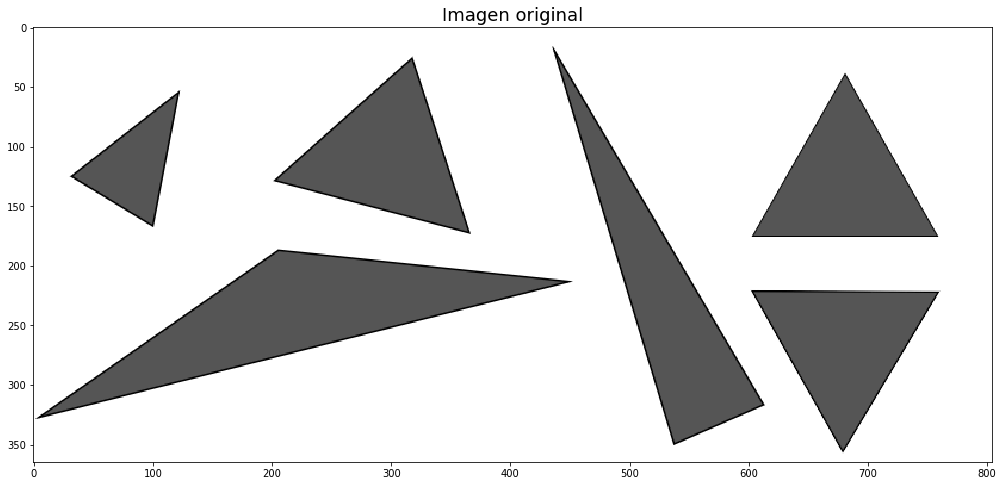

In [3]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(triangulos, cmap = 'gray');
plt.title("Imagen original", size = 18);

In [4]:
bin_triang = np.where(triangulos < 170, 255, 0)

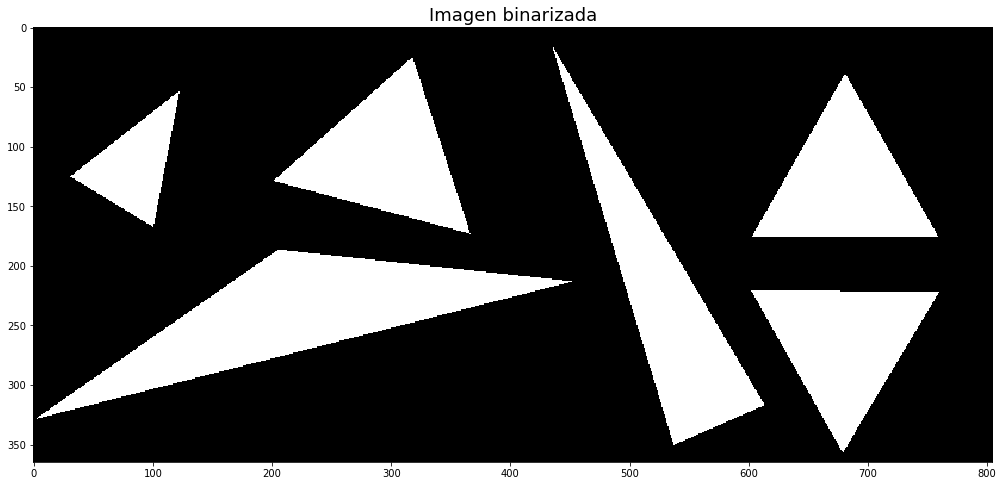

In [5]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(bin_triang, cmap = 'gray');
plt.title("Imagen binarizada", size = 18);

In [6]:
padd_bin_triang = cv.copyMakeBorder(bin_triang, 5, 5, 5, 5, cv.BORDER_CONSTANT)
imgu8 = np.uint8(padd_bin_triang)
contor = cv.Canny(imgu8, 50, 200, None, 3)
cv.imwrite('images/prueba.jpg', padd_bin_triang)

True

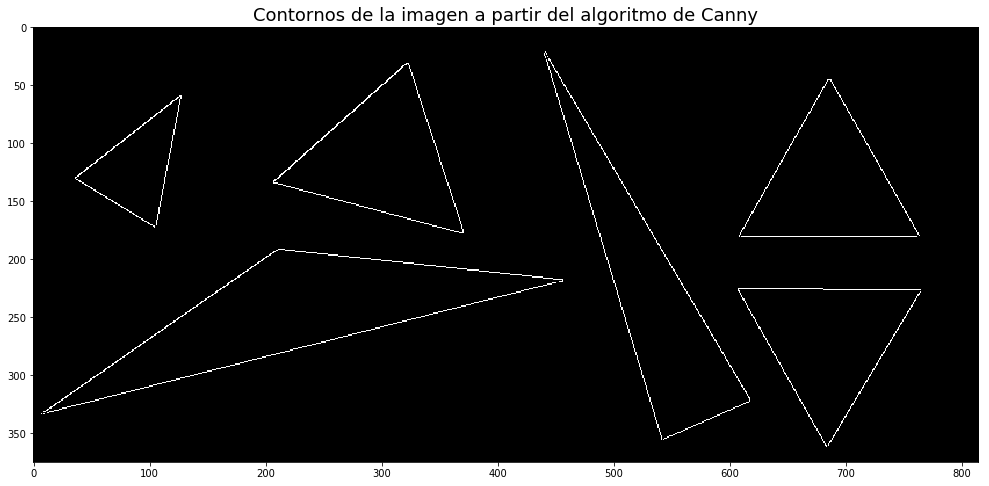

In [7]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(contor, cmap = 'gray');
plt.title("Contornos de la imagen a partir del algoritmo de Canny", size = 18);

__2.__ Encontrar los modelos de las rectas que forman cada arista. Para esto, solicite un umbral que elimine a las posibles aristas de longitud menor a dicho umbral. Los parámetros que debe encontrar de cada arista son $\theta$, $\rho$ y longitud. Hacer una tabla donde cada renglón sea una arista (identifíquelas con un número) y las columnas sean los parámetros indicados.

In [8]:
img_con_lineas = cv.cvtColor(contor, cv.COLOR_GRAY2BGR)
lineas = cv.HoughLines(contor, 1, np.pi / 180, 93, None, 0, 0)

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(img_con_lineas, pt1, pt2, (0,0,255), 1, cv.LINE_AA)

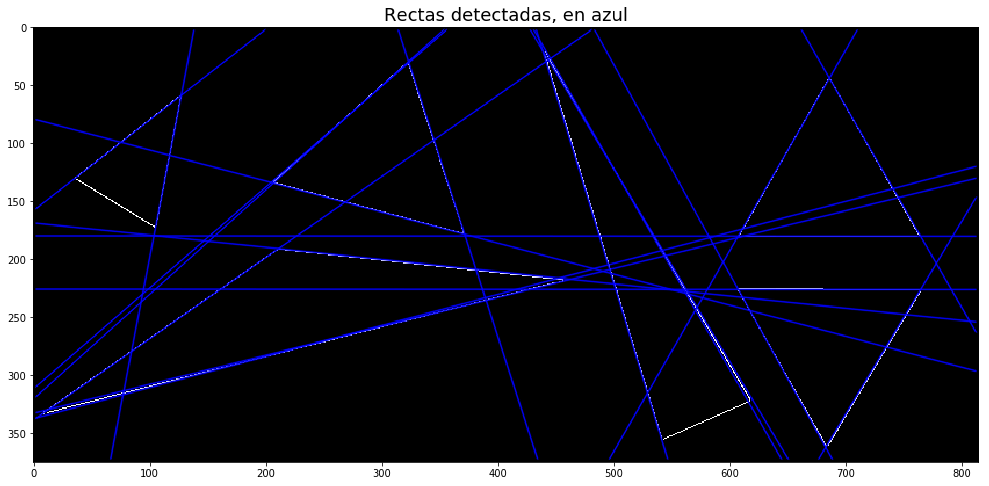

In [33]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineas);
plt.title("Rectas detectadas, en azul", size = 18);

In [10]:
print('Se detectaron', lineas.shape[0], 'rectas en la imagen')

Se detectaron 19 rectas en la imagen


Lo anterior indica __2 falsos negativos__ y __3 falsos positivos__, que más bien son redundancias.

In [11]:
print("recta\tradio    ángulo")

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1] * 180.0 / math.pi
    print(i, "\t", rho, "   ", theta)

recta	radio    ángulo
0 	 -414.0     162.99999201387476
1 	 277.0     54.999999253784715
2 	 168.0     96.00000267144338
3 	 323.0     75.99999983816295
4 	 180.0     90.00000250447816
5 	 -366.0     149.0000030079379
6 	 772.0     30.99999858592387
7 	 -298.0     161.99999767787153
8 	 136.0     11.000000021511672
9 	 238.0     48.00000133572169
10 	 616.0     30.000000834826057
11 	 -422.0     151.00000534032267
12 	 235.0     48.9999990868195
13 	 124.0     51.999999170302104
14 	 -372.0     149.99999734394112
15 	 76.0     104.99999950679661
16 	 326.0     74.99999867197056
17 	 -572.0     149.99999734394112
18 	 226.0     90.00000250447816


In [90]:
img_con_lineasp = cv.cvtColor(contor, cv.COLOR_GRAY2BGR)
lineas_p = cv.HoughLinesP(contor, 1, np.pi / 180, 45, None, 50, 7)

l = lineas_p[23][0]
cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)

"""
for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)"""

'\nfor i in range(len(lineas_p)):\n    l = lineas_p[i][0]\n    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)'

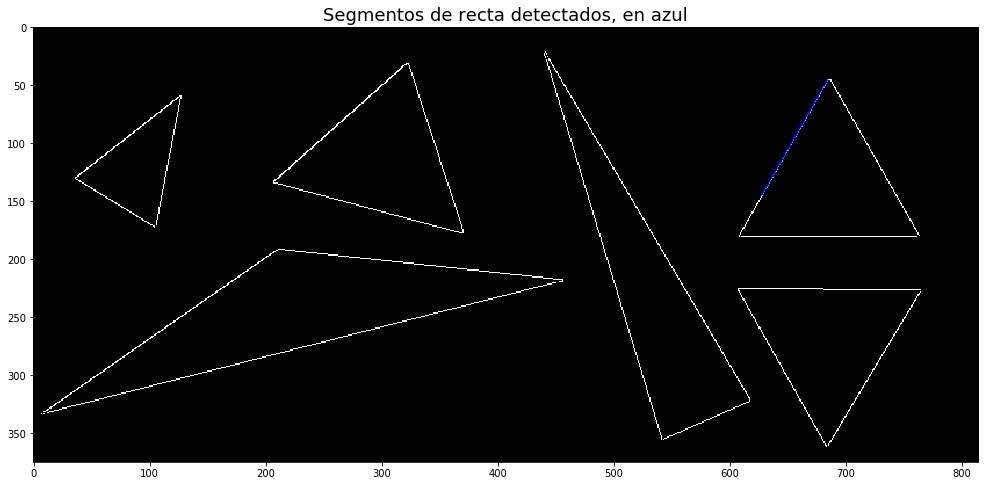

In [91]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineasp);
plt.title("Segmentos de recta detectados, en azul", size = 18);

In [14]:
print("Se detectaron", lineas_p.shape[0], "segmentos de recta")

Se detectaron 24 segmentos de recta


Claramente, están algunas cortadas y las etiquetas no van a coincidir :(

In [15]:
print("segmento\tlongitud")

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    longitud = math.sqrt((l[2] - l[0])**2 + (l[3] - l[1])**2)
    print(i, "\t", longitud)

segmento	longitud
0 	 246.34325645326686
1 	 347.97988447610015
2 	 246.37572932413616
3 	 191.049731745428
4 	 155.79473675320358
5 	 153.0
6 	 153.83432646844463
7 	 241.32343441945292
8 	 154.5477272560163
9 	 152.42703172337903
10 	 210.77238908357992
11 	 114.63420083029322
12 	 152.97058540778355
13 	 112.96902230257638
14 	 83.0
15 	 154.5477272560163
16 	 168.57639217873896
17 	 158.86157496386593
18 	 341.9488265808204
19 	 72.0
20 	 81.02468759581859
21 	 122.97154142320898
22 	 78.03204469959762
23 	 115.10430052782563


__3.__ Encontrar las aristas que son paralelas. Reporte cuántos grupos de aristas paralelas encontró y cuáles son paralelas entre ellas.

La rectas paralelas son las que tienen mismo ángulo y distinto radio. Por ahora, no voy a dar tolerancia.

In [16]:
mp = dict()

for i in range(lineas.shape[0]): 
    if lineas[i][0][1] in mp.keys():
        mp[lineas[i][0][1]][0].append(i)
        mp[lineas[i][0][1]][1] += 1
    else: 
        mp[lineas[i][0][1]] = [[i], 1]

ans = 0

for it in mp: 
    count = mp[it][1] 
    ans += (count * (count - 1)) // 2
    
print("Hay", ans, "pares de líneas paralelas.")

for trash, notrash in mp.items():
    if len(notrash[0]) > 1:
        print('Las líneas', notrash[0], 'son paralelas entre sí.')
        
print('Estas líneas son las del primer conjunto de etiquetas.')

Hay 2 pares de líneas paralelas.
Las líneas [4, 18] son paralelas entre sí.
Las líneas [14, 17] son paralelas entre sí.
Estas líneas son las del primer conjunto de etiquetas.


Debería haber tres pares de paralelas mas las redundancias, si hubiera tolerancia.

__4.__ De la lista de aristas obtenidas en el objetivo 2, agrupe aquellas que formen los triángulos observados en la imagen. Haga una tabla donde los renglones identifiquen al triángulo y las columnas (3) sean los números que identifiquen a las aristas que lo forman.

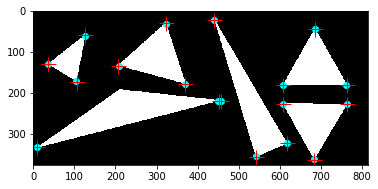

In [22]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

coords = corner_peaks(corner_harris(padd_bin_triang), min_distance=5)
coords_subpix = corner_subpix(padd_bin_triang, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(padd_bin_triang, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
#ax.axis((0, 310, 200, 0))
plt.show()

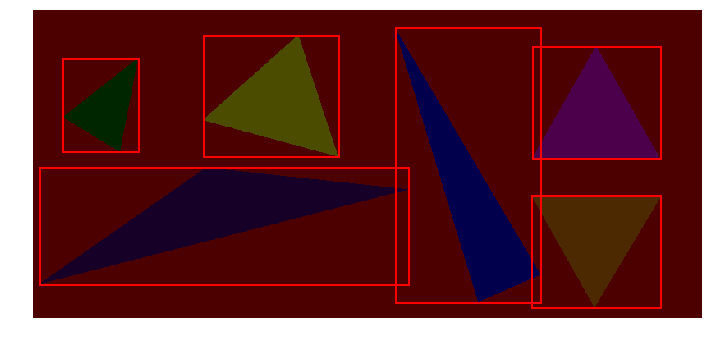

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


#image = data.coins()[50:-50, 50:-50]

# apply threshold
#thresh = threshold_otsu(image)
#bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
#cleared = clear_border(bw)

# label image regions
label_image = label(padd_bin_triang)
image_label_overlay = label2rgb(label_image, image=padd_bin_triang)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [43]:
print(label_image.shape, padd_bin_triang.shape)

(375, 815) (375, 815)


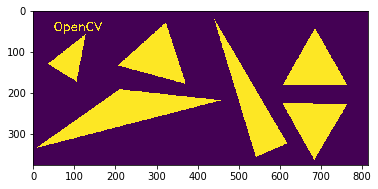

In [95]:
font = cv.FONT_HERSHEY_SIMPLEX 

# org 
org = (50, 50) 

# fontScale 
fontScale = 1

# Blue color in BGR 
color = (255, 0, 0) 

# Line thickness of 2 px 
thickness = 2

# Using cv2.putText() method 
imgconetiq = cv.putText(padd_bin_triang, 'OpenCV', org, font, fontScale, color, thickness, cv.LINE_AA) 

plt.imshow(imgconetiq)